# Separação de Amostras entre Treino/Teste/Validação

__Autoria:__ Sabrina Paes Leme P. Correa (paeslemesa@gmail.com) <br>
__Criação:__ 24/04/2024 <br>
__Modificação:__ 24/04/2024

__Descrição:__ Esse tutorial tem a intenção de usar alguns modelos de validação de aprendizagem de máquina para que estudemos melhor o comportamento do nosso classificador.

__Referências:__ 
* https://www.sas.upenn.edu/~fdiebold/NoHesitations/BookAdvanced.pdf
* https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

## 1. Importando bibliotecas

In [62]:
from pathlib import Path # biblioteca para manipulação de arquivos

import pandas as pd # biblioteca para manipulação de dados

import numpy as np # biblioteca para manipulação de vetores e matrizes

from sklearn.model_selection import train_test_split # função para dividir o dataset em treino e teste

from sklearn.neighbors import KNeighborsClassifier # modelo KNN para classificações supervisionadas

import matplotlib.pyplot as plt # biblioteca para plotar gráficos

## 2. Abrindo o arquivo de amostras

Os arquivos usados para este exemplo são as amostras criadas para uma área da Amazônia com o sensor MSI do Sentinel-2. Podem ser acessados através deste link: https://github.com/paeslemesa/tutoriaisPython/blob/main/amostras_aoi.csv

Como já falamos no tutorial 5 e 6, estamos trabalhando com uma classificação e fizemos amostras criando 4 classes**:
* 1 - Floresta
* 2 - Agua
* 3 - Pastagem
* 4 - Solo Exposto

** Recomendo procurarem masi informações sobre as melhroes classes para cada área de estudo antes de selecionarem elas. Existem vários estudos para isso.

In [2]:
# Eu gosto de determinar o diretorio em que estou trabalhando separadamente, porque consigo reutilizar o código em outros projetos com maior facilidade.
# Além disso, é mais fácil de mudar o diretório de trabalho, caso seja necessário.
# Além de manter o código mais organizado.

diretorio = Path("./")

arquivo = Path(diretorio, "amostras_aoi.csv") 

In [3]:
# Abrindo o arquiv CSV com a biblioteca pandas
df = pd.read_csv(arquivo)

df.head() # Mostrando as primeiras linhas do dataframe

,classe,azul,verde,vermelho,nir,ndvi
0,1,0.1323,0.1467,0.1256,0.4272,0.545586
1,1,0.1291,0.1460,0.1251,0.4213,0.542094
2,1,0.1262,0.1460,0.1221,0.3980,0.530475
3,1,0.1255,0.1438,0.1215,0.4216,0.552569
4,1,0.1281,0.1429,0.1236,0.3646,0.493650


Da mesma forma que já foi feito, eu vou selecionar aqui o mesmo número de amostras para cada classe para não enviesar meu classificador. Existem várias formas de pensarmos isso, essa solução é apenas uma sugestão, tá bem?

A gente consegue perceber que a classe Pastagem é a menos frequente com 26 622 amostras, então vamso selecionar aleatoriamente esse número de amostras de todas as classes.


In [4]:
df.groupby(by = "classe").count()

,azul,verde,vermelho,nir,ndvi
classe,,,,,
1,48619,48619,48619,48619,48619
2,92864,92864,92864,92864,92864
3,26622,26622,26622,26622,26622
4,35330,35330,35330,35330,35330


In [5]:
amostras = df.groupby(by='classe').sample( n = 26622, random_state= 42)
amostras.groupby(by = "classe").count()

,azul,verde,vermelho,nir,ndvi
classe,,,,,
1,26622,26622,26622,26622,26622
2,26622,26622,26622,26622,26622
3,26622,26622,26622,26622,26622
4,26622,26622,26622,26622,26622


## 3. Particionando as amostras

Nesta parte, vamos usar algumas formas de particionar as amostras usando a biblioteca <code>Sklearn</code>.
Para estudar essas formas, recomendo procurar livros de __Reconhecimento de Padrões__ e __Aprendizagem de Máquina__

Um livro que usei e uso bastante é do Hasting et al. (2009) -> https://www.sas.upenn.edu/~fdiebold/NoHesitations/BookAdvanced.pdf


### 3.1. Forma tradicional (hold-out)

O hold-out é a forma que tradicionalmente separamos as amostras em aproximadamente __75%__ para treinamento e __25%__ para validação.

Há modelos em que devemos gerar dados de teste também, como o Random Forest e modelos de Deep Learning, eu costumo usar a proporção 70%/15%/15%. Se o dataset for muito grande, até chego a usar 80%/10%/10%.

De qualquer forma, o mais importante é que a grande maioria dos dados esteja separada para o treinamento.

Outro ponto é que quando fazemos essa divisão, devemos garantir que ela seja verdade para todas as nossas classes, para isso, existe uma função so Sklearn própria para isso.

!! Outro ponto é que em classificação, nós chamamos de __X__ os dados das feições e __y__ o resultado (no caso, as classes)

In [7]:
# Agora, vamos dividir nossos dados em X e y, aonde X são as features e y é a classe que queremos prever
X = amostras.drop(columns = ["classe"]) # Retirando a coluna classe do dataframe
y = amostras["classe"] # Pegando apenas a coluna classe, que é o nosso y

In [9]:
percentagem_treino = 0.25

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = percentagem_treino, random_state = 42)

Prontinho! Agora usaremos nossos dados da seguinte forma:

* <code>X_train</code> e <code>y_train</code> -> usaremos apenas para o treinamento do modelo (<code>model.fit</code>)
* <code>X_test</code> -> usaremos para predizer nosso modelo resultante para teste que vai gerar o <code>y_predict</code> (<code>model.predict</code>)
* <code>y_test</code> -> usaremos para comparar as informações preditas (y_predict) com as verdadeiras (y_test) para calcularmos a acurácia do modelo.

#### Exemplo de Utilização
Como o foco deste tutorial é a separação das amostras, vou usar um classificadfor bem simples agora, o <code>KNN</code>, que é o vizinho mais próximo.

Mais informações, acesse: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [19]:
n_vizinhos = 5 # geralmente escolhemos um número impar

model = KNeighborsClassifier(n_neighbors= n_vizinhos) # Instanciando o modelo
model.fit(X_train, y_train) # Treinando o modelo

y_pred = model.predict(X_test) # Fazendo a predição

acuracia = model.score(X_test, y_test) # Calculando a acurácia

print(f"A acurácia do modelo foi de {acuracia:.4f}")

A acurácia do modelo foi de 0.9696


#### 3.1.1. Adicionando divisão para validação

Para dividir com treino/teste/validação, não fazemos isso de uma forma direta, precisamos calcular a proporção de treino e validação.

Se utilizarmos o caso da proporção 75/15/15, primeiro utilizamos a divisão normaç, definindo a percentagem_teste em __15%__. <br>
Depois precisamos calcular $\frac{0.15}{0.75}$ para determinar o valor que usaremos na segunda divisão.

In [13]:
percentagem_treino = 0.75
percentagem_teste = 0.15
percentagem_validacao = percentagem_teste / percentagem_treino

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= percentagem_teste, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=percentagem_validacao, random_state=42) # 0.2 x 0.75 = 0.15

### 3.2. Simulação de Monte Carlo

A simulação de Monte Carlo vai  repetir o método Hol-out quantas vezes quisermos, variando em como estamos dividindo as amostras. 

Para rodar a Monte Carlo, basta que usemos um loop FOR variando o <code>random_state</code> (o estado de aleatoriedade).

Para o caso abaixo, definimos repetir o modelo 10 vezes para rodar mais rápido, mas o ideal é pelo menos 100.

O objetivo maior maior da Monte Carlo é ver como ela reage com a variação das amostras de referência, então salvaremos a acurácia numa lista e calcularemos as estatísticas.

In [49]:
n_iteracoes = 10 #alterar para 100
n_vizinhos = 5

acuracia_monteCarlo = [] # Lista para armazenar as acurácias das classificações

model = KNeighborsClassifier(n_neighbors= n_vizinhos)

for i in range(n_iteracoes): # Loop para fazer a classificação várias vezes
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= percentagem_treino, random_state=i) # Dividindo os dados em treino e teste
    model.fit(X_train, y_train) # Treinando o modelo
    acuracia_monteCarlo.append(model.score(X_test, y_test)) # Calculando a acurácia e armazenando na lista

print(f"A acurácia média do modelo foi de {sum(acuracia_monteCarlo)/len(acuracia_monteCarlo):.4f}")
print(f"A acurácia máxima do modelo foi de {max(acuracia_monteCarlo):.4f}")
print(f"A acurácia mínima do modelo foi de {min(acuracia_monteCarlo):.4f}")
print(f"O desvio padrão da acurácia do modelo foi de {np.std(acuracia_monteCarlo):.4f}")
    

A acurácia média do modelo foi de 0.9677
A acurácia máxima do modelo foi de 0.9680
A acurácia mínima do modelo foi de 0.9669
O desvio padrão da acurácia do modelo foi de 0.0003


Uma forma de analisar esses dados é por gráficos, onde podemos analisar a acurácia em relação a iteração.

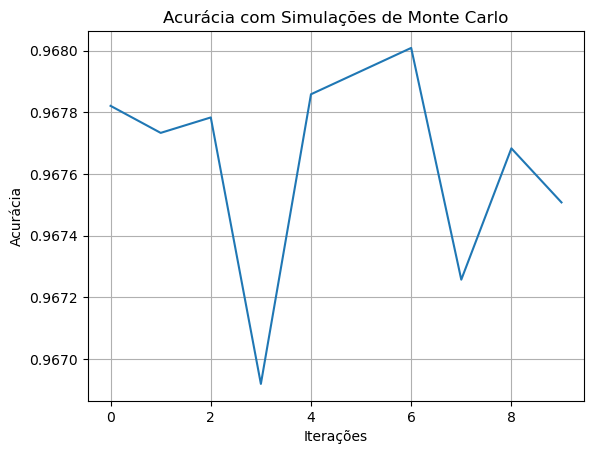

In [64]:
fig, ax = plt.subplots()
ax.plot(range(len(acuracia_monteCarlo)), acuracia_monteCarlo)

ax.set(xlabel='Iterações', ylabel='Acurácia',
       title='Acurácia com Simulações de Monte Carlo')
ax.grid()

plt.show()

### 3.3. Valização Cruzada

A validação cruzada vai separaros dados em $n$ iterações. Existem vários submétodos dentro da validação cruzada (cross-validation), eles são bem mostrados aqui: https://scikit-learn.org/stable/modules/cross_validation.html

Para um exemplo com simples validação cruzada, usaremos:

In [30]:
from sklearn.model_selection import cross_val_score # Função para fazer a validação cruzada

In [57]:
acuracias_crossVal = cross_val_score(model, X, y, cv=5)

acuracias_crossVal

array([0.97145272, 0.9694807 , 0.97009109, 0.96839931, 0.97055923])

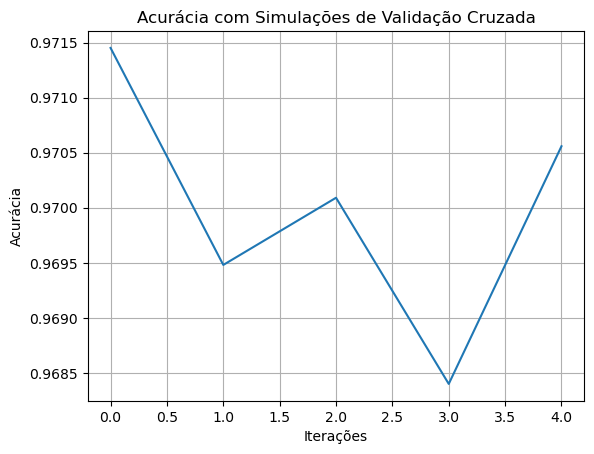

In [65]:
fig, ax = plt.subplots()
ax.plot(range(len(acuracias_crossVal)), acuracias_crossVal)

ax.set(xlabel='Iterações', ylabel='Acurácia',
       title='Acurácia com Simulações de Validação Cruzada')
ax.grid()

plt.show()

#### 3.3.1. Embaralhar e separar - Estratificado (Stratified Shuffle $ Split)

Este modelo é um iterador que vai gerar uma quantidade aleatória de amostras de treino/teste. Diferente das outras técnicas, no Sklearn, esse iterador vai nos dar os índices mantendo proporções das classes que estamos usando. E apartir dos índices, conseguimos trabalhar na classificação

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit

In [60]:
n_separacoes = 5
percentagem_treino = 0.75

acuracia_SSS = []

iterador = StratifiedShuffleSplit(n_splits= n_separacoes, train_size = percentagem_treino, random_state=42)

for i, (train_index, test_index) in enumerate(iterador.split(X, y)):
    print(f"Separação {i}:")

    # Aqui vamos selecionar nossas amostras baseadas nos indices (index) que o iterador nos forneceu
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train)

    acuracia_SSS.append(model.score(X_test, y_test))
    print(f"Acurácia do modelo: {model.score(X_test, y_test):.4f}")

print(f"\n\nA acurácia média do modelo foi de {sum(acuracia_SSS)/len(acuracia_SSS):.4f}")
print(f"A acurácia máxima do modelo foi de {max(acuracia_SSS):.4f}")
print(f"A acurácia mínima do modelo foi de {min(acuracia_SSS):.4f}")
print(f"O desvio padrão da acurácia do modelo foi de {np.std(acuracia_SSS):.4f}")

Separação 0:
Acurácia do modelo: 0.9704
Separação 1:
Acurácia do modelo: 0.9710
Separação 2:
Acurácia do modelo: 0.9692
Separação 3:
Acurácia do modelo: 0.9710
Separação 4:
Acurácia do modelo: 0.9710


A acurácia média do modelo foi de 0.9705
A acurácia máxima do modelo foi de 0.9710
A acurácia mínima do modelo foi de 0.9692
O desvio padrão da acurácia do modelo foi de 0.0007


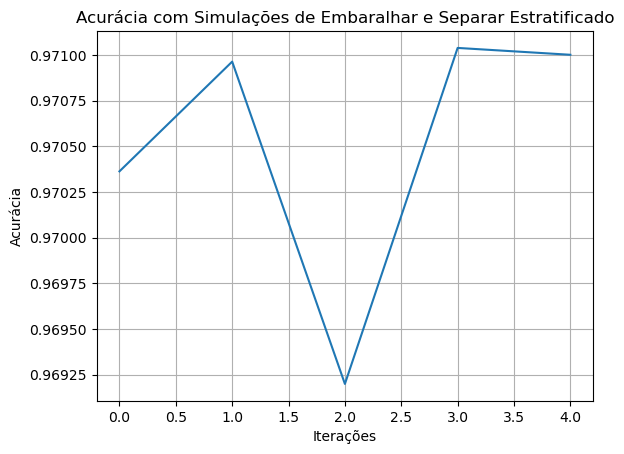

In [66]:
fig, ax = plt.subplots()
ax.plot(range(len(acuracia_SSS)), acuracia_SSS)

ax.set(xlabel='Iterações', ylabel='Acurácia',
       title='Acurácia com Simulações de Embaralhar e Separar Estratificado')
ax.grid()

plt.show()